In [1]:
import pandas, numpy, matplotlib.pyplot
import sklearn
import seaborn

In [2]:
data = pandas.read_csv('data/9Aug(2).csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


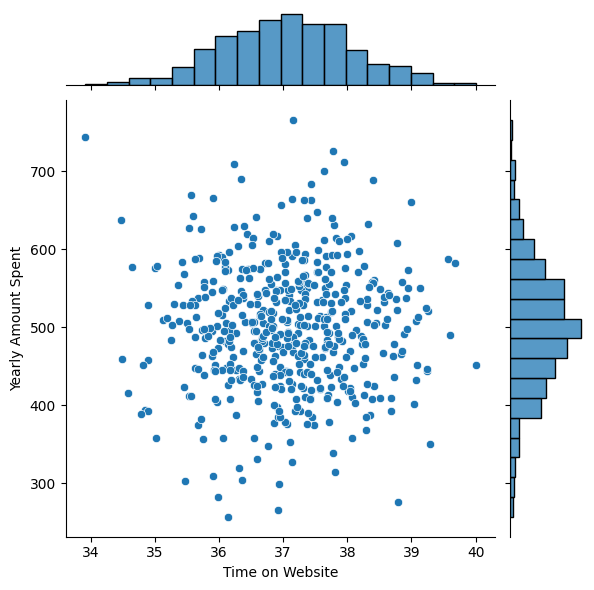

In [3]:
seaborn.jointplot(x='Time on Website', y='Yearly Amount Spent', data = data)

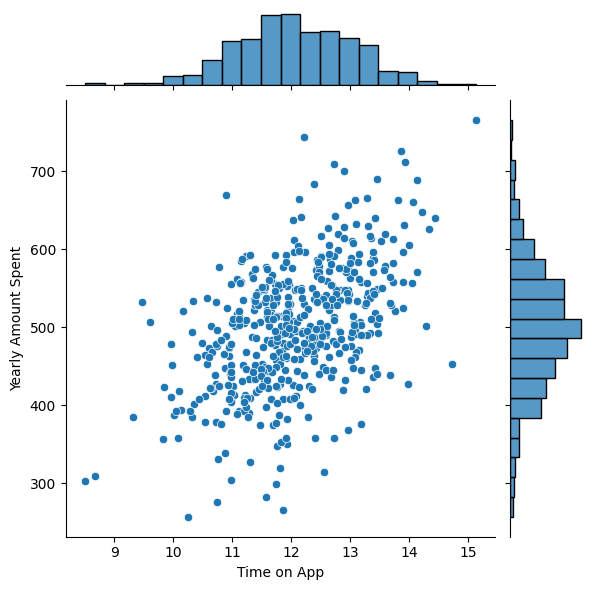

In [4]:
seaborn.jointplot(x='Time on App', y='Yearly Amount Spent', data = data)

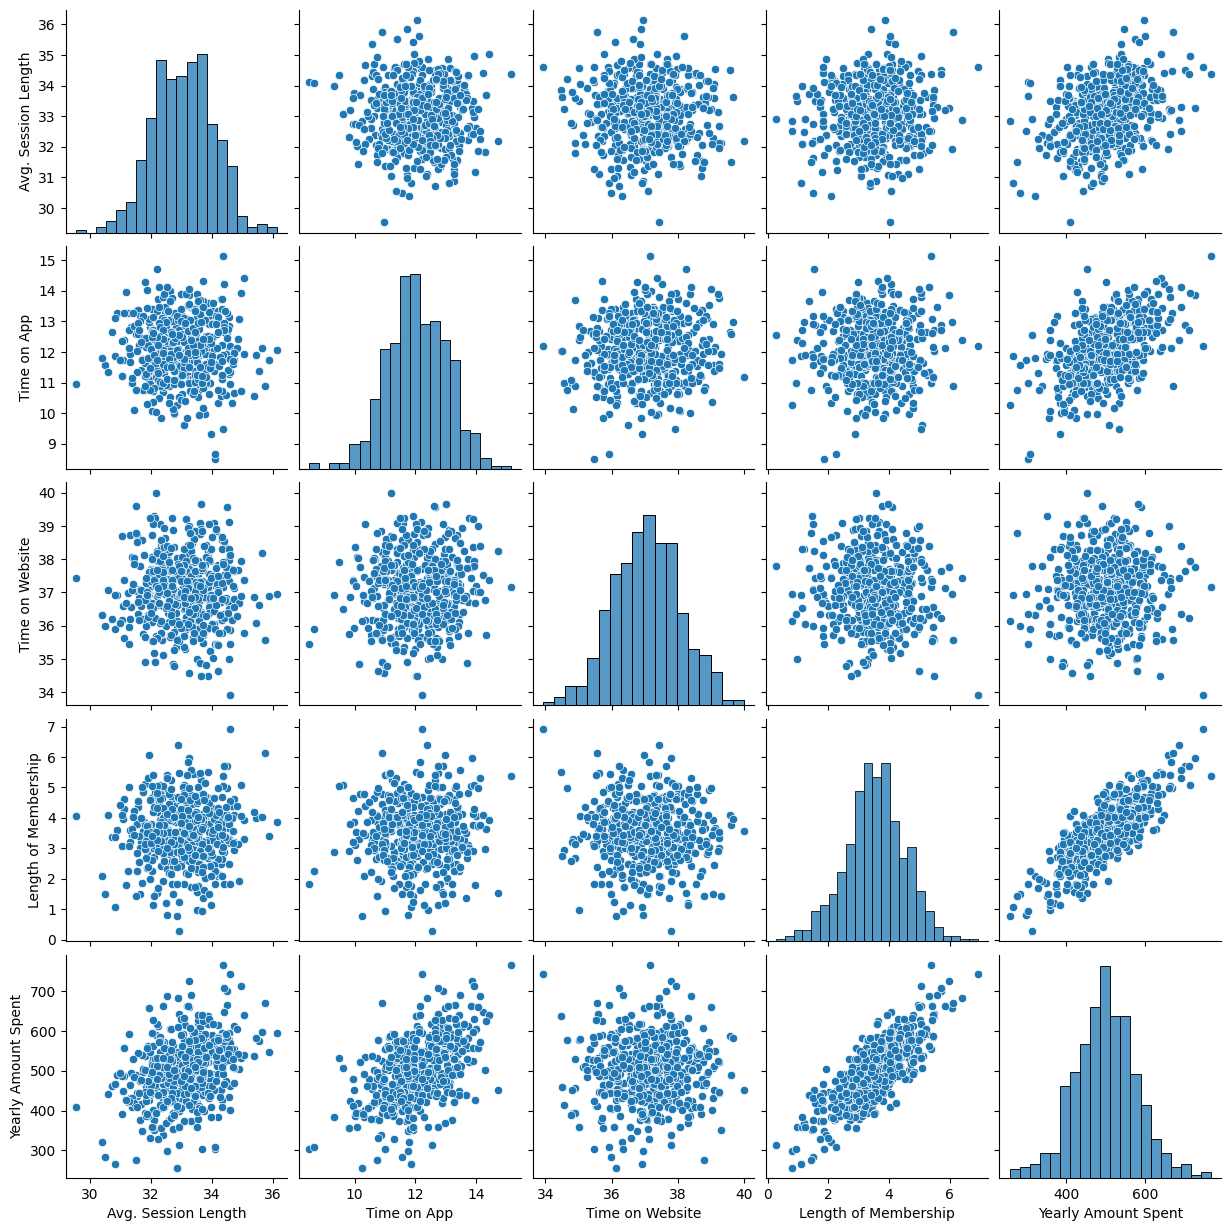

In [5]:
seaborn.pairplot(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data = data.iloc[:, 3:]
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (350, 4)
X_test.shape: (150, 4)
y_train.shape: (350,)
y_test.shape: (150,)


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(f"Accuracy in training data: {reg.score(X_train, y_train)}")

Accuracy in training data: 0.9832092998556319


In [11]:
print(f"coefficients: {reg.coef_}")
print(f"constants: {reg.intercept_}")

coefficients: [25.84580231 39.11666374  0.62766627 61.18352934]
constants: -1066.036128345712


## Testing

Accuracy in test data: 0.9867360284847678


Text(0, 0.5, 'Yearly Amount Spent')

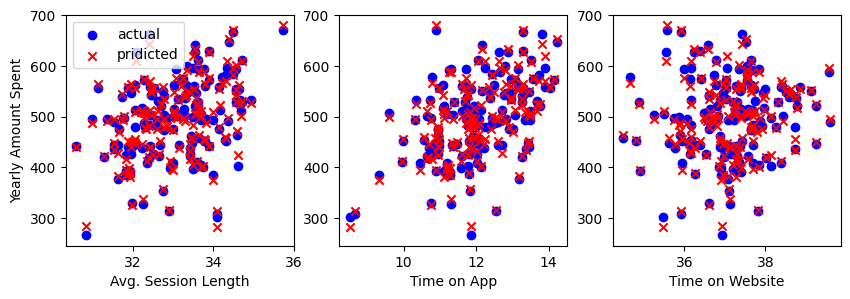

In [12]:
print(f"Accuracy in test data: {reg.score(X_test, y_test)}")

y_test_predict = reg.predict(X_test)

fig, ax = matplotlib.pyplot.subplots(1,3, figsize=(10,3))

for i in range(len(ax)):
    ax[i].scatter(X_test.iloc[:, i], y_test, c='b', marker='o', facecolor='none', label='actual')
    ax[i].scatter(X_test.iloc[:, i], y_test_predict, marker='x', c='r', label='pridicted')
    ax[i].set_xlabel(X_test.columns[i])
ax[0].legend()
ax[0].set_ylabel('Yearly Amount Spent')

## Parameter Metric

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

print(f"mean_absolute_error: {mean_absolute_error(y_test, y_test_predict)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_test_predict)}")
print(f"root_mean_squared_error: {root_mean_squared_error(y_test, y_test_predict)}")

mean_absolute_error: 7.372523900398722
mean_squared_error: 80.57308001156048
root_mean_squared_error: 8.97625088840327


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

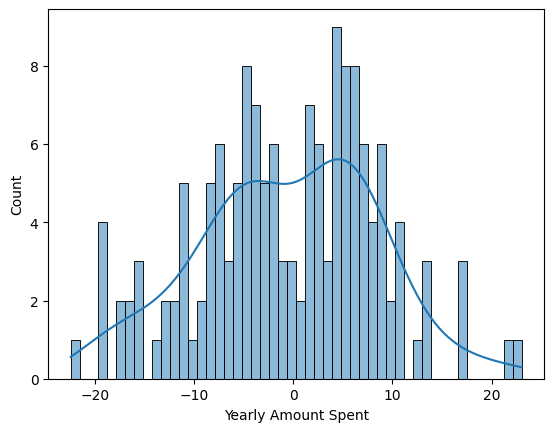

In [14]:
seaborn.histplot((y_test_predict - y_test), bins=50, kde=True)

## Regularisation vector

Cost fuction

$$ J(\vec{w},b)= \frac{1}{2m} \sum_{i=0}^{m} (\hat{y}_i - y_i)^2  + \frac{\lambda}{2m} \sum_{j=0}^n {w_j}^2$$

- $w_j$ are coefficients of the model
- $ \lambda$ is regularisation factor
- $n$ is number of feature or coefficients bias excluded

_q_ what will be update rule for multiple linear regrssion when regularisation term is already added

$$\frac {\partial{J(\vec{w},b)}}{\partial{w_j}} = \frac{1}{m} \sum_{i=0}^{m}({\hat{y}_i - y_i}) x_j + \frac{\lambda}{m} w_j$$

# Design multiple linear regression model using provided dataset by utilising regularisation factor to prevent overfitting.

In [15]:
data = pandas.read_csv('data/12Aug.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('encode', OneHotEncoder(sparse_output=False), ['State'])], remainder='passthrough')
ct.set_output(transform='pandas')

data = ct.fit_transform(data)
data.head()

,encode__State_California,encode__State_Florida,encode__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend,remainder__Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X.head()

,encode__State_California,encode__State_Florida,encode__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


Text(0, 0.5, 'profit')

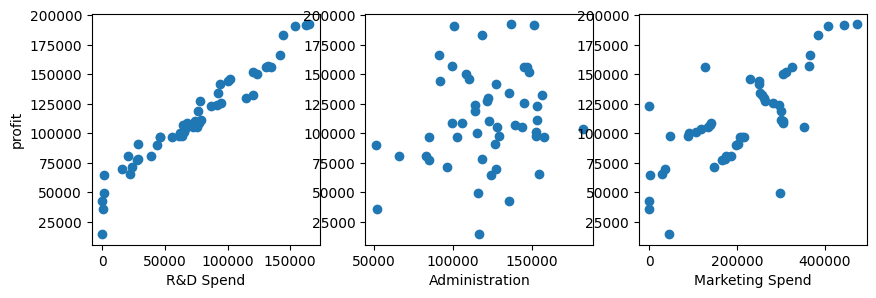

In [18]:
fig, ax = matplotlib.pyplot.subplots(1,3, figsize=(10,3))

for i in range(len(ax)):
    ax[i].scatter(X.iloc[:, i+3], y)
    ax[i].set_xlabel(X.columns[i+3].split('__')[-1])
ax[0].set_ylabel('profit')

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (35, 6)
X_test.shape: (15, 6)
y_train.shape: (35,)
y_test.shape: (15,)


## Normalise

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct_norm = ColumnTransformer([('normalise', StandardScaler(), [3,4,5])], remainder='passthrough')

X_train_norm = ct_norm.fit_transform(X_train)
X_train_norm[:5, :]

array([[ 0.70872031,  0.72052123,  0.8305451 ,  0.        ,  0.        ,
         1.        ],
       [-0.10104951,  0.98373226, -0.86173754,  0.        ,  0.        ,
         1.        ],
       [ 0.28323506, -0.86047794, -0.40586226,  0.        ,  0.        ,
         1.        ],
       [ 0.31573768,  1.02072343,  0.97998531,  0.        ,  0.        ,
         1.        ],
       [-1.57793624,  0.38735665, -1.62986467,  1.        ,  0.        ,
         0.        ]])

## Training

In [21]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV()

reg.fit(X_train_norm, y_train)
print(f"Training accuracy score: {reg.score(X_train_norm, y_train)}")
print(f"weights: {reg.coef_}")
print(f"bias: {reg.intercept_}")

Training accuracy score: 0.9658932207958562
weights: [32344.91921752   855.25344094  2033.27996313  1419.8450482
  -194.63303526 -1225.21201294]
bias: 105019.01171153113


## Testing

In [22]:
X_test_norm = ct_norm.transform(X_test)

print(f"Test accuracy socre: {reg.score(X_test_norm, y_test)}")

Test accuracy socre: 0.9099824481947836


Text(0, 0.5, 'profit')

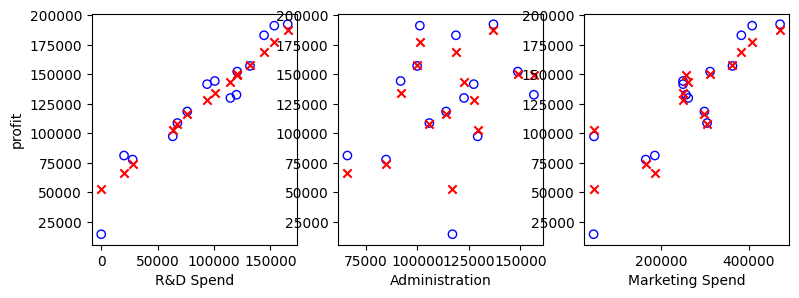

In [23]:
y_test_predict = reg.predict(X_test_norm)

fig, ax = matplotlib.pyplot.subplots(1, 3, figsize=(9, 3)) 

for i in range(len(ax)):
    ax[i].scatter(X_test.iloc[:, i+3], y_test, marker='o', facecolors='none', edgecolors='b', label='actual')
    ax[i].scatter(X_test.iloc[:, i+3], y_test_predict, marker='x', c='r')
    ax[i].set_xlabel(X.columns[i+3].split('__')[-1])
ax[0].set_ylabel('profit')

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

print(f"mean_absolute_error: {mean_absolute_error(y_test, y_test_predict)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_test_predict)}")
print(f"root_mean_squared_error: {root_mean_squared_error(y_test, y_test_predict)}")

mean_absolute_error: 10295.330376969108
mean_squared_error: 191825685.02959096
root_mean_squared_error: 13850.114982540432
